# 🤯 How to Connect GitHub with Jupyter Notebook (and Not Die in the Attempt)

By María Fernanda López

Next, you'll find a guide to connect GitHub with Jupyter Notebook. But first, a quick reminder of what GitHub is.

> GitHub is a cloud-based platform where developers can store, share, and collaborate on code projects. Think of it like an online "home" for your code — it lets you save your work, track changes over time, and work together with others as a team. 🧑‍💻🌍

[GitHub documentation](https://docs.github.com/es/get-started/start-your-journey/about-github-and-git)

## 🧾 Step 0: Create a GitHub Account

Before anything else...  
You’ll need a **GitHub account**! 🎯

If you don’t have one yet, go to:  
👉 [https://github.com/join](https://github.com/join)

It’s free and takes just a couple of minutes.  
Once you’re in, you’ll be ready to create and manage your own code repositories! 🚀

### ⚠️ Some considerations

To follow this guide smoothly, here’s what you’ll need:

1. 🐋 **Docker installed on your machine**  
   If you don’t have it yet, download and install it from:  
   👉 [https://www.docker.com/products/docker-desktop](https://www.docker.com/products/docker-desktop)

2. 📦 **A Docker image with Jupyter and Git**  
   In this guide, we’ll use a Docker container that already has Jupyter Notebook.  
   But we’ll install Git inside it (don’t worry, I’ll show you how 😉).

## 🛠️ Step 1: Install Git in the Docker Container

First, let's start (or enter) the container where you'll be working.  
This command runs the container and mounts a local folder so your files are saved:

`docker run -it -p 8888:8888 -v "/c/Users/Andres Wilches/Documents/programacion-sig:/notebooks" petebunting/au-eoed bash`

🔹 This opens an interactive terminal inside the container.

Once you're inside, install Git with the following commands:

`apt update`

`apt install git -y`

🤔 **So… what are these commands doing?**

**apt update**: Think of this as refreshing the grocery list 🛒 — it updates the list of available software so your system knows what’s out there. It doesn’t install anything yet, just gets things ready.

**apt install git -y**: This one installs Git. The -y is like saying “yes to everything” 🙋‍♂️, so it doesn’t stop to ask you questions during the install — it just gets it done!

### Evidence that it is working!👍

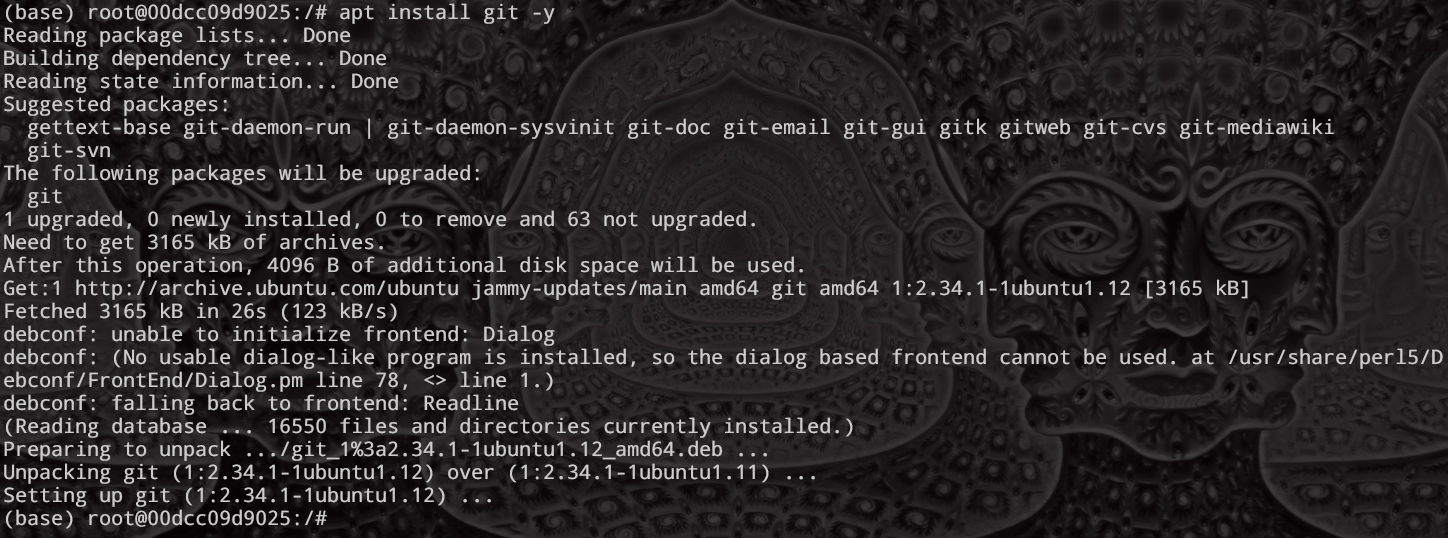

🧪 To check if Git was installed successfully, run:

`git --version`

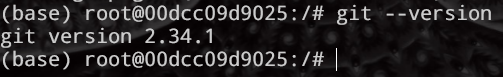

## 🧾 Step 2: Tell Git who you are (Only once per device)

Before you start using Git, you need to introduce yourself — just once per computer.  
This helps Git know who’s making changes in your projects.

Here’s how you do it:

```bash
git config --global user.name "María Fernanda López"
git config --global user.email "malopezsu@unal.edu.co"

🔍 These settings get saved in a file called `.gitconfig`, and they'll be automatically used in any future Git projects on this machine.

Want to double-check what you’ve set? Just run:

`git config --list`

## 🧾 Step 3: Create a new repository on GitHub

Ready to start your project? First, let’s set up your online repository.

#### 🧭 Follow these steps:

1. Go to [GitHub.com](https://github.com) and log into your account.
2. Click the green **"New repository"** button (top left or on your dashboard).

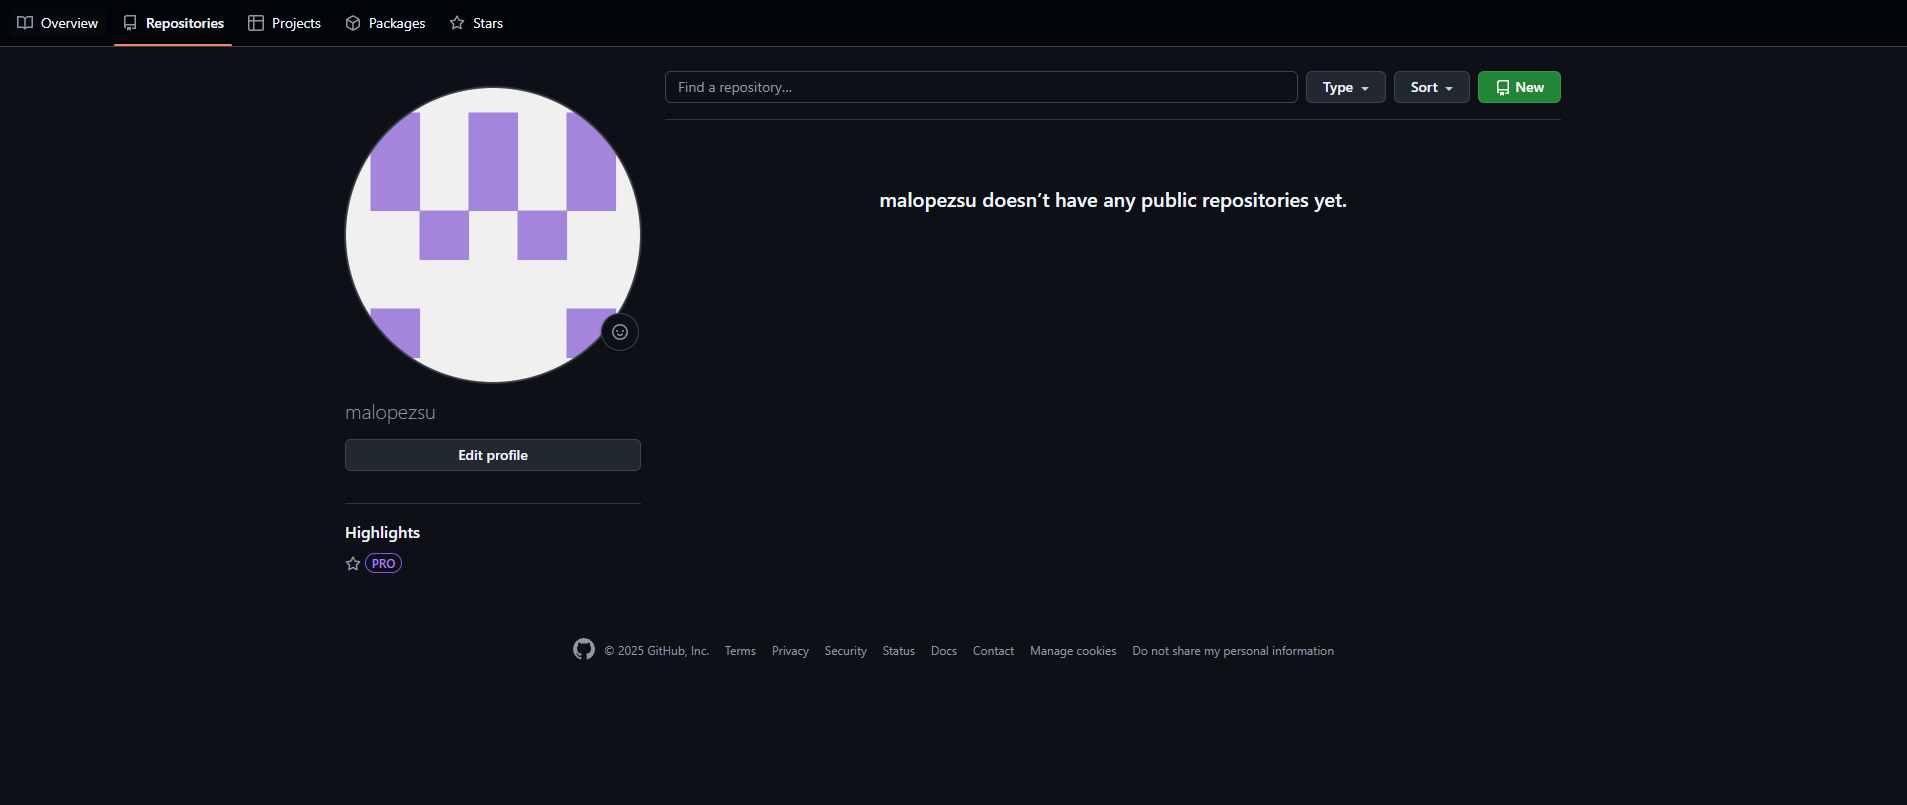

3. Fill in the details:
   - **Repository name**: Example – `geoprocessing`
   - Choose whether it should be **public** (anyone can see it) or **private** (just you and invited collaborators).
4. Hit **"Create repository"** at the bottom.
5. Once created, GitHub will take you to the repo page. Now you need the **clone URL**.

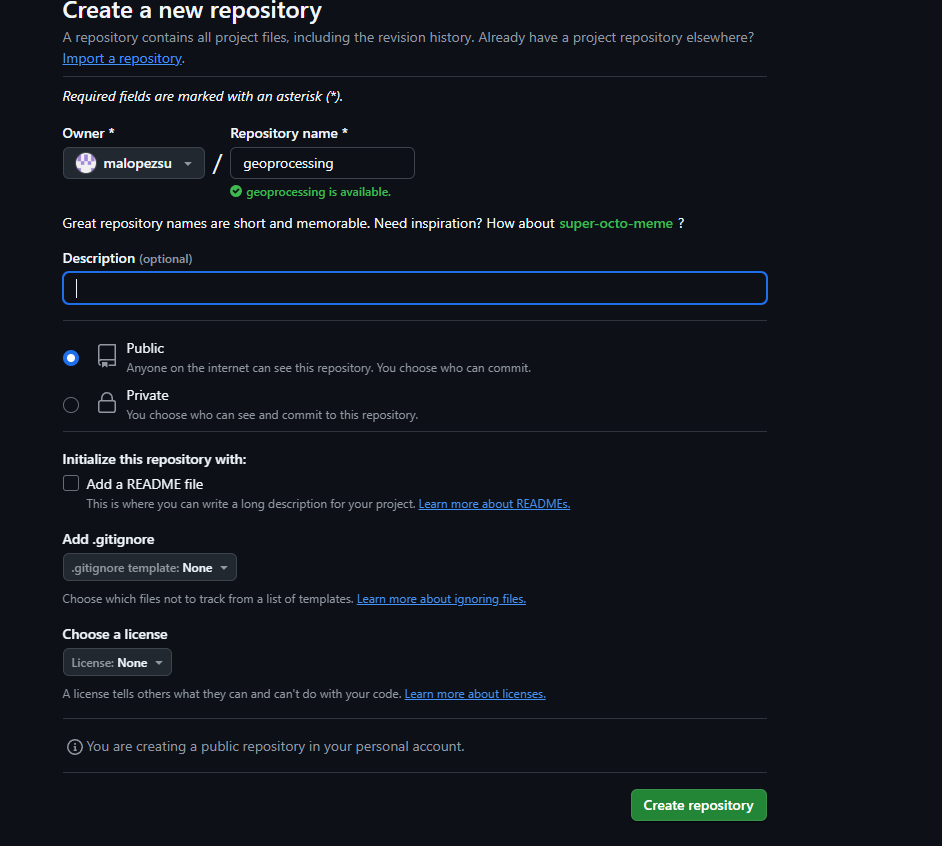

#### 🔗 Which URL should I use — HTTPS or SSH?

You’ll see options like:

| Option | URL Example | When to Use It | Next Step |
|-------|--------------|----------------|-----------|
| **HTTPS** | `https://github.com/malopezsu/geoprocessing.git` | If you don’t have SSH keys, or you're on a network that blocks SSH (e.g., some companies) | Use with `git clone <url>` |
| **SSH** | `git@github.com:malopezsu/geoprocessing.git` | If you’ve already set up an SSH key and added it to GitHub (in Settings → SSH keys) | Use with `git clone <url>` |

#### ❓ Not Sure Which One to Use?

> If you're just getting started, go with **HTTPS**.  
> It works right away and doesn’t need extra setup.

> Once you’re more comfortable (and want to avoid typing passwords), you can switch to **SSH** by setting up an SSH key and linking it to your GitHub account.

To change your repo to use SSH later:

```bash
git remote set-url origin git@github.com:youruser/project.git

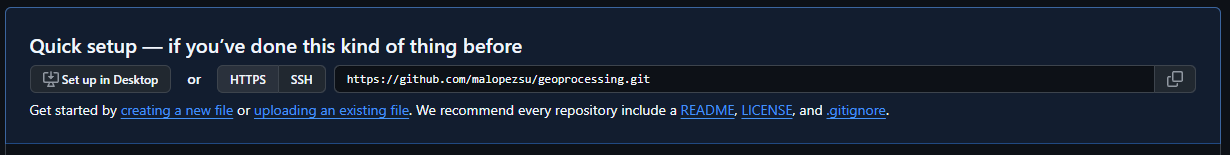

#### ⚡ Quick Decision Table

| Situation                      | Use This  | Extra Setup Needed? |
| ------------------------------ | --------- | ------------------- |
| Just starting out              | **HTTPS** | ❌ No                |
| You’ve already set up SSH keys | **SSH**   | ✅ Yes, just once    |

## 🔐 Step 4: Set Up HTTPS Access Between Docker and GitHub (Optional)

Once you've created your GitHub repository (see previous step) and it's still empty, you can now upload your notebook into it.

In this exercise, we'll upload a Jupyter notebook to the repository you just created.

We'll use the **HTTPS** method for connecting to GitHub.

Before pushing anything, make sure your Docker container is up and running.  
Here’s how to launch it with your notebooks folder mounted:

`docker run -it -p 8888:8888 -v "/c/Users/Andres Wilches/Documents/programacion-sig:/notebooks" petebunting/au-eoed bash`

Once you're inside the Docker container, go to the folder where your Jupyter notebook is located.

You can open a terminal in that folder and run the following commands to prepare it for uploading to GitHub:

```bash
git init
git branch -m main #For config the name of the branch
git remote add origin https://github.com/malopezsu/geoprocessing.git
git add . #In this case because I want to updoad all the information in the folder
git commit -m ":memo: Add initial notebook"  
git push -u origin main

After running the `git push` command, Git will prompt you for your GitHub credentials:

> Username for 'https://github.com': malopezsu
> Password for 'https://malopezsu@github.com':

Since GitHub no longer accepts your actual account password when using HTTPS, you'll need to use a **Personal Access Token (PAT)** instead.

Here's how to generate one:

#### How can I obtain a Personal Access Token (PAT)

1. Go to GitHub settings:
👉 https://github.com/settings/tokens

2. Click "Generate new token (classic)"
3. Fill out the form:
Note: something like Docker push token

Expiration: set as you wish (e.g., 30 days or "No expiration")

Scopes: at least check repo

4. Click Generate token
5. Copy the token that appears

## 🔐 Step 4: Set Up SSH Access Between Docker and GitHub

Let’s make your life easier by setting up **SSH access** — so you can push and pull from GitHub without typing a username or token every time.

This only takes a few minutes and saves you **tons of time** later.

#### 👣 Generate an SSH Key (inside the Docker container)

Run this command:

```bash
ssh-keygen -t ed25519 -C "your@email.com"

* If it asks where to save the file, just press Enter to accept the default (/root/.ssh/id_ed25519)

* When asked for a passphrase, you can press Enter again (or set one if you want extra security)

✅ You should see something like:

```bash
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub

#### 📋 Show and Copy Your Public Key
Now let’s see your public key:

```bash
cat ~/.ssh/id_ed25519.pub

🔗 Copy the full output — it starts with ssh-ed25519 and ends with your email.

#### 🌐 Add the SSH Key to GitHub

1. Go to https://github.com/settings/keys
2. Click "New SSH Key"
3. Give it a name (e.g., “Docker container”)
4. Paste the key you copied earlier into the Key field
5. Click "Add SSH key"

#### 🧪 Test the Connection
Now let’s test that everything’s working:

```bash
ssh -T git@github.com

The first time, GitHub will ask if you trust the connection — type `yes`.

If everything worked, you’ll see a message like:

`Hi yourusername! You've successfully authenticated, but GitHub does not provide shell access.`

🎉 That means SSH is ready!

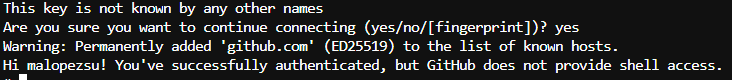

## 🔄 Step 5: Working with Your GitHub Repository

Now that your local project is connected to your GitHub repository, you can start syncing your work — in both directions!

#### 🔍 Check the Remote Connection

First, let’s make sure Git knows where to push and pull from:

```bash
git remote -v

You should see something like this:

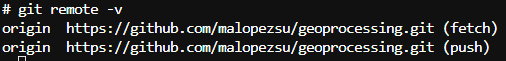

#### 🔄 Sync with the Remote Repository

Before making changes, it’s always a good idea to make sure your local project is up to date.

#### 📁 Case A: Your GitHub repository is empty
No sync needed — your local repo has the only files. You can jump right into editing and uploading.

Continue to start working!

#### 🔁 Case B: The remote already has content
Pull any updates first to avoid conflicts:

```bash
git pull origin main

If there are changes, Git will merge them into your local version.

If there are conflicts, Git will notify you. Resolve them manually by editing the conflicted files, then run:

```bash
git add conflicted_file.ipynb
git commit -m "Resolve merge conflict"

#### 📓 See What’s Changed

Check which files were modified using:

```bash
git status

You’ll see:

🟥 Files in red → modified but not yet tracked

🟩 Files in green → ready to be committed

#### ➕ Stage the Files You Want to Save

Choose what changes to include in your next version:

```bash
git add your-notebook.ipynb

Or stage everything:

```bash
git add .

#### 💬 Commit Your Changes

Create a snapshot of your progress with a meaningful message:

```bash
git commit -m "Add NDVI calculation notebook"

Each commit is saved in Git’s version history, like a save point in a game 🎮

#### 📤 Push Your Changes to GitHub

Upload your latest commit to the remote repository:

```bash
git push origin main

Your work is now safely stored in the cloud and visible on GitHub 🚀